<div class="alert alert-block alert-info">
    
<h1 style="color:Blue;"> <center> <ins> <b> 
Métodos Numéricos - Projeto Final 
</b> </ins> </center> </h1>
    
<h3 style="color:Blue;"> <center> <b> 
Análise de Imagens Biomédicas
</b></center> </h3>

<h3 style="color:Blue;"> <center> <b> 
Jhonatan Pereira
</b></center> </h3>
    
</div>

<div class="alert alert-block alert-info" style="color:Blue;" id="descricao">
Descrição do Projeto
</div>

Analisar e tratar uma imagem biomédica é uma tarefa que requer conhecimentos diversos e que, tipicamente, é resolvida com métodos numéricos como os que trabalhamos na disciplina, principalmente de álgebra linear computacional, uma vez que imagens são, a grosso modo, matrizes. 

O que faz o tratamento com esse tipo de imagem mais desafiador? A captura de imagens biomédicas nem sempre vem com grande resolução e/ou precisão, sendo necessário, nesses casos, saber tratar a imagem antes de ter uma visualização que leve a algum diagnóstico. 

Felizmente, existem ferramentas fantásticas e muitos recursos para apoiá-lo. Nessa parte do projeto, vamos nos concentrar em vários princípios subjacentes à análise de imagens biomédicas. Você aprenderá a explorar matrizes multidimensionais, enfatizar recursos importantes usando máscaras e filtros, extrair medidas específicas de objetos e comparar várias imagens ou pacientes. Embora isso apenas arranhe a superfície do campo, fornecerá uma base sólida para conceitos avançados, como classificação e segmentação. Durante todo o processo, contaremos com pacotes no principal ecossistema de computação científica do Python: ImageIO, NumPy, SciPy e Matplotlib, além de outras que auxiliarão algumas especificidades.

Ao final do projeto, espero que vocês ganhem um pouco de percepção do quão poderosos são alguns métodos e ferramentas que trabalhamos para resolver problemas complexos e reais e como vale a pena aprofundar o conhecimento nesses métodos, mesmo que no dia a dia usemos bibiotecas especializadas. Isso nos permite deixar de ser meros usuários de funções e nos dá criticidade sobre o problema que queremos resolver - o grande objetivo da disciplina.

Esse projeto será guiado, o que significa que vocês trabalharão com um roteiro de atividades, que vão desde de execuções de códigos que explicam alguns tópicos até a aplicação desses conhecimentos em atividades específicas que estão espalhadas ao longo do notebook.

Basicamente, nós teremos quatro partes no trabalho:

* __Análise Exploratória de Imagens Biomédicas__: aqui veremos como carregar, construir e navegar em imagens N-dimensionais usando uma imagem de Tomografia computadorizada do tórax humano. Também aproveitaremos para trabalhar com o útil pacote ImageIO e aprimorar as habilidades de NumPy e Matplotlib.

* __Uso de Máscaras e Filtros em Imagens Biomédicas__: Corte o processamento de imagens até o osso, transformando imagens de raios-x. Você aprenderá a explorar padrões de intensidade para selecionar sub-regiões de uma matriz e usará filtros convolucionais para detectar recursos interessantes. Você também usará o módulo ndimage do SciPy, que contém um excelentes ferramentas de processamento de imagem.

* __Medidas em Imagens Biomédicas__: aqui chegaremos ao coração da análise de imagens: medição de objetos. Usando uma série temporal cardíaca 4D, você determinará se é provável que um paciente tenha doença cardíaca. Ao longo do caminho, você aprenderá os fundamentos da segmentação de imagens, rotulagem de objetos e medição morfológica.

* __Comparação de Imagens Biomédicas__: na última parte, você precisará usar seu cérebro... e centenas de outros! Extraindo dados de mais de 400 imagens de ressonância magnética de acesso aberto, você aprenderá os conceitos básicos de registro, reamostragem e comparação de imagens. Em seguida, você usará as medidas extraídas para avaliar o efeito da doença de Alzheimer na estrutura do cérebro.

Bom trabalho e bom aprendizado!

<div class="alert alert-block alert-info" style="color:Blue;" id="parte1">
Análise Exploratória de Imagens Biomédicas
</div>

Imagens biomédicas: mais de um século de descobertas
Desde a primeira radiografia em 1895, a tecnologia de imagens médicas avançou o atendimento clínico e abriu novos campos de investigação científica. A quantidade de dados de imagem está explodindo: em 2020, estima-se que haja mais de três bilhões e meio de terabytes apenas nos EUA. Isso criou oportunidades incríveis para análise: medir a forma e o tamanho dos órgãos; criar reconstruções detalhadas da anatomia; análise da composição tecidual; prever patologia e muito mais. A complexidade e a variedade dos dados podem torná-lo um campo intimidador para entrar.

Para aquecer, vamos carregar e plotar uma única imagem. Podemos ler imagens usando o pacote `ImageIO`. Sua função `imread()` pegará um único arquivo e o carregará como um objeto de imagem. Um recurso útil do `ImageIO` é que ele pode ler arquivos DICOM, o formato padrão para imagens médicas humanas. Os dados são lidos como um objeto de imagem, que é um tipo de matriz NumPy.

Para acessar valores específicos de sua imagem, você pode dividir um único valor ou um intervalo de valores de índice ao longo de cada dimensão.

Nessa parte do projeto, trabalharemos com seções de [tomografia computadorizada](https://en.wikipedia.org/wiki/CT_scan) (TC) do [The Cancer Imaging Archive](https://www.cancerimagingarchive.net/about-the-cancer-imaging-archive-tcia/). A TC usa um tubo de raios X rotativo para criar uma imagem 3D da área alvo.

O conteúdo real da imagem depende do instrumento usado: as fotografias medem a luz visível, os raios X e a tomografia computadorizada medem a absorção de radiação e os scanners de ressonância magnética medem os campos magnéticos.

Para aquecer, use o pacote imageio para carregar uma única imagem DICOM do volume de varredura e confira alguns de seus atributos. DICOM é a sigla para _Digital Imaging and Communications in Medicine_ (Comunicação de Imagens Digitais em Medicina) e representa um conjunto de normas criado para padronizar o formato eletrônico utilizado no armazenamento e na comunicação das imagens.  Com a padronização, todos os tipos de exames - tomografias, ressonâncias, radiografias etc - são armazenados em um formato único, permitindo a troca entre equipamentos de marcas distintas. A criação desse conjunto de normas possibilita que as imagens sejam reconhecidas e visualizadas em qualquer um desses equipamentos.

Antes de tudo, vamos iniciar baixando todos os conjuntos de dados que usaremos nessa parte, acessando esse [link](https://assets.datacamp.com/production/repositories/2085/datasets/f44726fefae841afd24ddf83c58f34722212e67a/tcia-chest-ct-sample.zip).

Uma vez baixado o arquivo, vamos trabalhar com a biblioteca `ImageIO`.

In [12]:
import imageio

E agora podemos ler a imagem (_o caminho abaixo é o do meu computador, veja onde você salvou as imagens!_) e obter informações sobre sua forma.

In [3]:
im = imageio.imread('datasets/tcia-chest-ct-sample/chest-220.dcm')

In [15]:
im_220 = imageio.imread('datasets/tcia-chest-ct-sample/chest-220.dcm')
im_221 = imageio.imread('datasets/tcia-chest-ct-sample/chest-221.dcm')
im_222 = imageio.imread('datasets/tcia-chest-ct-sample/chest-222.dcm')
im_224 = imageio.imread('datasets/tcia-chest-ct-sample/chest-224.dcm')
im_225 = imageio.imread('datasets/tcia-chest-ct-sample/chest-225.dcm')

In [4]:
print('Tipo de imagem:', type(im))
print('Dimensão da matriz da imagem:', im.shape)

Tipo de imagem: <class 'imageio.core.util.Array'>
Dimensão da matriz da imagem: (512, 512)


e vemos que temos uma imagem em formato de _array_, como decodificado pela `ImageIO`, formada por uma matriz de 512 linhas e 512 colunas. Se quisermos fazer uma rápida inspeção nessa matriz, basta chamá-la.

In [5]:
im

Array([[-1000, -1000, -1000, ..., -1000, -1000, -1000],
       [-1000, -1000, -1000, ..., -1000, -1000, -1000],
       [-1000, -1000, -1000, ..., -1000, -1000, -1000],
       ...,
       [-1000, -1000, -1000, ..., -1000, -1000, -1000],
       [-1000, -1000, -1000, ..., -1000, -1000, -1000],
       [-1000, -1000, -1000, ..., -1000, -1000, -1000]], dtype=int16)

---

__Tarefa 1:__ Analise a forma dos demais arquivos contidos na pasta baixada. A dimensão e os valores repetem o mesmo desse exemplo? Imprima as imagens na tela para entender e explicar por que essas diferenças acontecem. 

---

As imagens são sempre adquiridas em um contexto específico. Essas informações são frequentemente chamadas de metadados. O ImageIO carrega os metadados disponíveis em um dicionário, acessível por meio do atributo meta. Isso é especialmente importante para arquivos DICOM, que contêm muitas informações do paciente e da aquisição. Como meta é um dicionário Python, você pode acessar informações específicas indexando-as com uma das chaves disponíveis. Este arquivo, por exemplo, inclui um campo de modalidade. Você também pode chamar o método keys para listar todos os metadados disponíveis.

`ImageIO` lê dados como objetos `Image`. Esses são arrays NumPy padrão com um dicionário de metadados.

Os metadados podem ser bastante ricos em imagens médicas e podem incluir:

* Dados demográficos do paciente: nome, idade, sexo, informações clínicas
* Informações de aquisição: formato da imagem, taxas de amostragem, tipo de dados, modalidade (como raio-X, tomografia computadorizada ou ressonância magnética)

A lista de metadados disponíveis pode ser vista por essas chaves

In [6]:
im.meta.keys()

odict_keys(['TransferSyntaxUID', 'SOPClassUID', 'SOPInstanceUID', 'StudyDate', 'SeriesDate', 'ContentDate', 'StudyTime', 'SeriesTime', 'ContentTime', 'Modality', 'Manufacturer', 'StudyDescription', 'SeriesDescription', 'PatientName', 'PatientID', 'PatientBirthDate', 'PatientSex', 'PatientWeight', 'StudyInstanceUID', 'SeriesInstanceUID', 'SeriesNumber', 'AcquisitionNumber', 'InstanceNumber', 'ImagePositionPatient', 'ImageOrientationPatient', 'SamplesPerPixel', 'Rows', 'Columns', 'PixelSpacing', 'BitsAllocated', 'BitsStored', 'HighBit', 'PixelRepresentation', 'RescaleIntercept', 'RescaleSlope', 'PixelData', 'shape', 'sampling'])

In [28]:
print('Dimensão da matriz da imagem 220:', im_220.shape)
print('Dimensão da matriz da imagem 221:', im_221.shape)
print('Dimensão da matriz da imagem 222:', im_222.shape)
print('Dimensão da matriz da imagem 224:', im_224.shape)
print('Dimensão da matriz da imagem 225:', im_225.shape)

Dimensão da matriz da imagem 220: (512, 512)
Dimensão da matriz da imagem 221: (512, 512)
Dimensão da matriz da imagem 222: (512, 512)
Dimensão da matriz da imagem 224: (512, 512)
Dimensão da matriz da imagem 225: (512, 512)


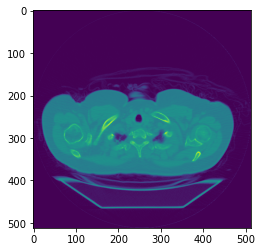

In [14]:
plt.imshow(im)

In [26]:
im[250:350]

Array([[-1000, -1000, -1000, ..., -1000, -1000, -1000],
       [-1000, -1000,  -978, ...,  -978,  -972, -1000],
       [-1000, -1000,  -983, ...,  -952,  -958, -1000],
       ...,
       [-1000, -1000, -1000, ..., -1000, -1000, -1000],
       [-1000, -1000, -1000, ..., -1000, -1000, -1000],
       [-1000, -1000, -1000, ..., -1000, -1000, -1000]], dtype=int16)

In [27]:
im_221[250:350]

Array([[-1000, -1000,  -999, ..., -1000, -1000, -1000],
       [-1000, -1000,  -962, ...,  -984, -1000, -1000],
       [-1000, -1000,  -979, ..., -1000, -1000, -1000],
       ...,
       [-1000, -1000, -1000, ..., -1000, -1000, -1000],
       [-1000, -1000, -1000, ..., -1000, -1000, -1000],
       [-1000, -1000, -1000, ..., -1000, -1000, -1000]], dtype=int16)

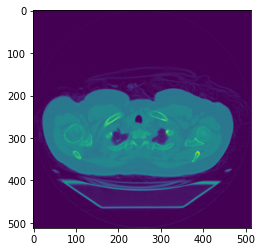

In [16]:
plt.imshow(im_221)

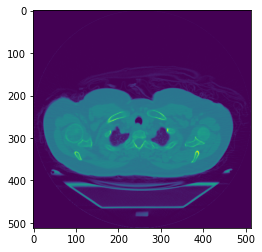

In [17]:
plt.imshow(im_222)

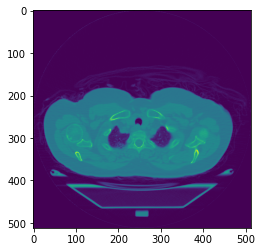

In [18]:
plt.imshow(im_224)

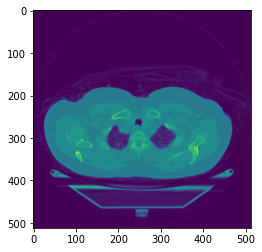

In [19]:
plt.imshow(im_225)

---

__Tarefa 2:__ Busque na documentação da biblioteca a descrição de cada um desses metadados. Em seguida, para cada uma das imagens dessa tarefa, extraia todas as informações referentes ao paciente,  e também sobre o estudo realizado.   

---

Nosso próximo passo é visualizar as imagens estudadas, contando, para isso, com a ajuda da biblioteca `Matplotlib`. 

In [10]:
import matplotlib.pyplot as plt

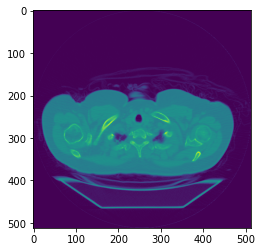

In [11]:
plt.imshow(im)

In [38]:
im.meta

Dict([('TransferSyntaxUID', '1.2.840.10008.1.2'),
      ('SOPClassUID', '1.2.840.10008.5.1.4.1.1.2'),
      ('SOPInstanceUID',
       '1.3.6.1.4.1.14519.5.2.1.5168.1900.290866807370146801046392918286'),
      ('StudyDate', '20040529'),
      ('SeriesDate', '20040515'),
      ('ContentDate', '20040515'),
      ('StudyTime', '115208'),
      ('SeriesTime', '115254'),
      ('ContentTime', '115325'),
      ('Modality', 'CT'),
      ('Manufacturer', 'GE MEDICAL SYSTEMS'),
      ('StudyDescription', 'PET CT with registered MR'),
      ('SeriesDescription', 'CT IMAGES - RESEARCH'),
      ('PatientName', 'STS_007'),
      ('PatientID', 'STS_007'),
      ('PatientBirthDate', ''),
      ('PatientSex', 'F '),
      ('PatientWeight', 82.0),
      ('StudyInstanceUID',
       '1.3.6.1.4.1.14519.5.2.1.5168.1900.381397737790414481604846607090'),
      ('SeriesInstanceUID',
       '1.3.6.1.4.1.14519.5.2.1.5168.1900.315477836840324582280843038439'),
      ('SeriesNumber', 2),
      ('AcquisitionNumber'

In [32]:
im_221.meta

Dict([('TransferSyntaxUID', '1.2.840.10008.1.2'),
      ('SOPClassUID', '1.2.840.10008.5.1.4.1.1.2'),
      ('SOPInstanceUID',
       '1.3.6.1.4.1.14519.5.2.1.5168.1900.117244866459483316475052892983'),
      ('StudyDate', '20040529'),
      ('SeriesDate', '20040515'),
      ('ContentDate', '20040515'),
      ('StudyTime', '115208'),
      ('SeriesTime', '115254'),
      ('ContentTime', '115325'),
      ('Modality', 'CT'),
      ('Manufacturer', 'GE MEDICAL SYSTEMS'),
      ('StudyDescription', 'PET CT with registered MR'),
      ('SeriesDescription', 'CT IMAGES - RESEARCH'),
      ('PatientName', 'STS_007'),
      ('PatientID', 'STS_007'),
      ('PatientBirthDate', ''),
      ('PatientSex', 'F '),
      ('PatientWeight', 82.0),
      ('StudyInstanceUID',
       '1.3.6.1.4.1.14519.5.2.1.5168.1900.381397737790414481604846607090'),
      ('SeriesInstanceUID',
       '1.3.6.1.4.1.14519.5.2.1.5168.1900.315477836840324582280843038439'),
      ('SeriesNumber', 2),
      ('AcquisitionNumber'

In [34]:
im_222.meta

Dict([('TransferSyntaxUID', '1.2.840.10008.1.2'),
      ('SOPClassUID', '1.2.840.10008.5.1.4.1.1.2'),
      ('SOPInstanceUID',
       '1.3.6.1.4.1.14519.5.2.1.5168.1900.667063731451481034223408581515'),
      ('StudyDate', '20040529'),
      ('SeriesDate', '20040515'),
      ('ContentDate', '20040515'),
      ('StudyTime', '115208'),
      ('SeriesTime', '115254'),
      ('ContentTime', '115325'),
      ('Modality', 'CT'),
      ('Manufacturer', 'GE MEDICAL SYSTEMS'),
      ('StudyDescription', 'PET CT with registered MR'),
      ('SeriesDescription', 'CT IMAGES - RESEARCH'),
      ('PatientName', 'STS_007'),
      ('PatientID', 'STS_007'),
      ('PatientBirthDate', ''),
      ('PatientSex', 'F '),
      ('PatientWeight', 82.0),
      ('StudyInstanceUID',
       '1.3.6.1.4.1.14519.5.2.1.5168.1900.381397737790414481604846607090'),
      ('SeriesInstanceUID',
       '1.3.6.1.4.1.14519.5.2.1.5168.1900.315477836840324582280843038439'),
      ('SeriesNumber', 2),
      ('AcquisitionNumber'

In [35]:
im_224.meta

Dict([('TransferSyntaxUID', '1.2.840.10008.1.2'),
      ('SOPClassUID', '1.2.840.10008.5.1.4.1.1.2'),
      ('SOPInstanceUID',
       '1.3.6.1.4.1.14519.5.2.1.5168.1900.588758574161605866969158164912'),
      ('StudyDate', '20040529'),
      ('SeriesDate', '20040515'),
      ('ContentDate', '20040515'),
      ('StudyTime', '115208'),
      ('SeriesTime', '115254'),
      ('ContentTime', '115325'),
      ('Modality', 'CT'),
      ('Manufacturer', 'GE MEDICAL SYSTEMS'),
      ('StudyDescription', 'PET CT with registered MR'),
      ('SeriesDescription', 'CT IMAGES - RESEARCH'),
      ('PatientName', 'STS_007'),
      ('PatientID', 'STS_007'),
      ('PatientBirthDate', ''),
      ('PatientSex', 'F '),
      ('PatientWeight', 82.0),
      ('StudyInstanceUID',
       '1.3.6.1.4.1.14519.5.2.1.5168.1900.381397737790414481604846607090'),
      ('SeriesInstanceUID',
       '1.3.6.1.4.1.14519.5.2.1.5168.1900.315477836840324582280843038439'),
      ('SeriesNumber', 2),
      ('AcquisitionNumber'

In [36]:
im_225.meta

Dict([('TransferSyntaxUID', '1.2.840.10008.1.2'),
      ('SOPClassUID', '1.2.840.10008.5.1.4.1.1.2'),
      ('SOPInstanceUID',
       '1.3.6.1.4.1.14519.5.2.1.5168.1900.231606570874529734865142509646'),
      ('StudyDate', '20040529'),
      ('SeriesDate', '20040515'),
      ('ContentDate', '20040515'),
      ('StudyTime', '115208'),
      ('SeriesTime', '115254'),
      ('ContentTime', '115325'),
      ('Modality', 'CT'),
      ('Manufacturer', 'GE MEDICAL SYSTEMS'),
      ('StudyDescription', 'PET CT with registered MR'),
      ('SeriesDescription', 'CT IMAGES - RESEARCH'),
      ('PatientName', 'STS_007'),
      ('PatientID', 'STS_007'),
      ('PatientBirthDate', ''),
      ('PatientSex', 'F '),
      ('PatientWeight', 82.0),
      ('StudyInstanceUID',
       '1.3.6.1.4.1.14519.5.2.1.5168.1900.381397737790414481604846607090'),
      ('SeriesInstanceUID',
       '1.3.6.1.4.1.14519.5.2.1.5168.1900.315477836840324582280843038439'),
      ('SeriesNumber', 2),
      ('AcquisitionNumber'

Tipicamente, imagens médicas usam escalas de cinza para facilitar o processamento e busca do que se chamam de artefatos, que basicamente são elementos estranhos a imagem que possam indicar a incidência de algum problema. Para isso, obter a imagem em escala de cinza, basta fazer:

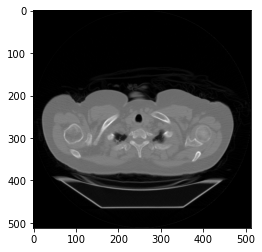

In [29]:
plt.imshow(im, cmap='gray')

---

__Tarefa 3:__ Imprima as imagens na tela dos arquivos baixados. Há diferença entre as amostras? Quais seriam? Essas diferenças também podem ser consideradas na análise dos metadados?

---

Text(0.5, 1.0, 'chest-225')

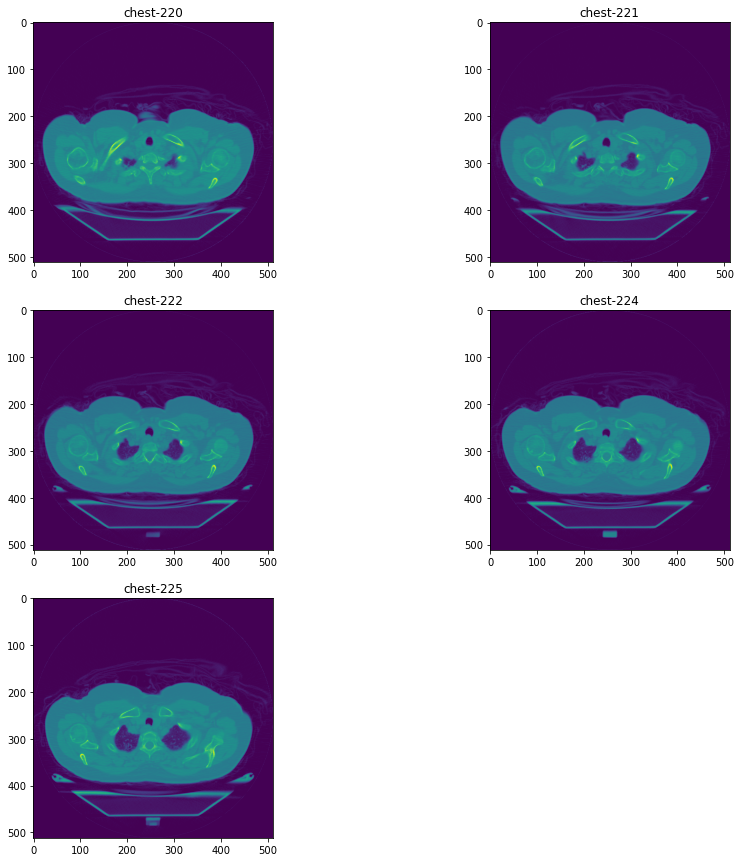

In [48]:
fig = plt.figure(figsize=(15, 15))

rows = 3
columns = 2

fig.add_subplot(rows, columns, 1)
plt.imshow(im_220)
plt.title("chest-220")
fig.add_subplot(rows, columns, 2)
plt.imshow(im_221)
plt.title("chest-221")
fig.add_subplot(rows, columns, 3)
plt.imshow(im_222)
plt.title("chest-222")
fig.add_subplot(rows, columns, 4)
plt.imshow(im_224)
plt.title("chest-224")
fig.add_subplot(rows, columns, 5)
plt.imshow(im_225)
plt.title("chest-225")

In [52]:
print(im_220.meta, '\n')
print(im_221.meta, '\n')
print(im_222.meta, '\n')
print(im_224.meta, '\n')
print(im_225.meta)

Dict([('TransferSyntaxUID', '1.2.840.10008.1.2'), ('SOPClassUID', '1.2.840.10008.5.1.4.1.1.2'), ('SOPInstanceUID', '1.3.6.1.4.1.14519.5.2.1.5168.1900.290866807370146801046392918286'), ('StudyDate', '20040529'), ('SeriesDate', '20040515'), ('ContentDate', '20040515'), ('StudyTime', '115208'), ('SeriesTime', '115254'), ('ContentTime', '115325'), ('Modality', 'CT'), ('Manufacturer', 'GE MEDICAL SYSTEMS'), ('StudyDescription', 'PET CT with registered MR'), ('SeriesDescription', 'CT IMAGES - RESEARCH'), ('PatientName', 'STS_007'), ('PatientID', 'STS_007'), ('PatientBirthDate', ''), ('PatientSex', 'F '), ('PatientWeight', 82.0), ('StudyInstanceUID', '1.3.6.1.4.1.14519.5.2.1.5168.1900.381397737790414481604846607090'), ('SeriesInstanceUID', '1.3.6.1.4.1.14519.5.2.1.5168.1900.315477836840324582280843038439'), ('SeriesNumber', 2), ('AcquisitionNumber', 1), ('InstanceNumber', 57), ('ImagePositionPatient', (-250.0, -250.0, -180.62)), ('ImageOrientationPatient', (1.0, 0.0, 0.0, 0.0, 1.0, 0.0)), ('S

---

__Tarefa 4:__ Explore, a partir da documentação, a variação do contraste das imagens (ou seja, a distância entre as cores mais claras e mais escuras é menor do que antes) a partir dos parâmetros `vmin` e `vmax`.

---

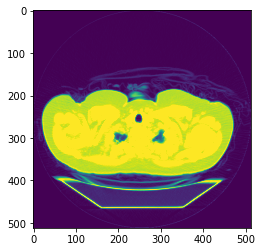

In [78]:
plt.imshow(im_220, vmax=0.2)

Text(0.5, 1.0, 'chest-225 vmax=0.5')

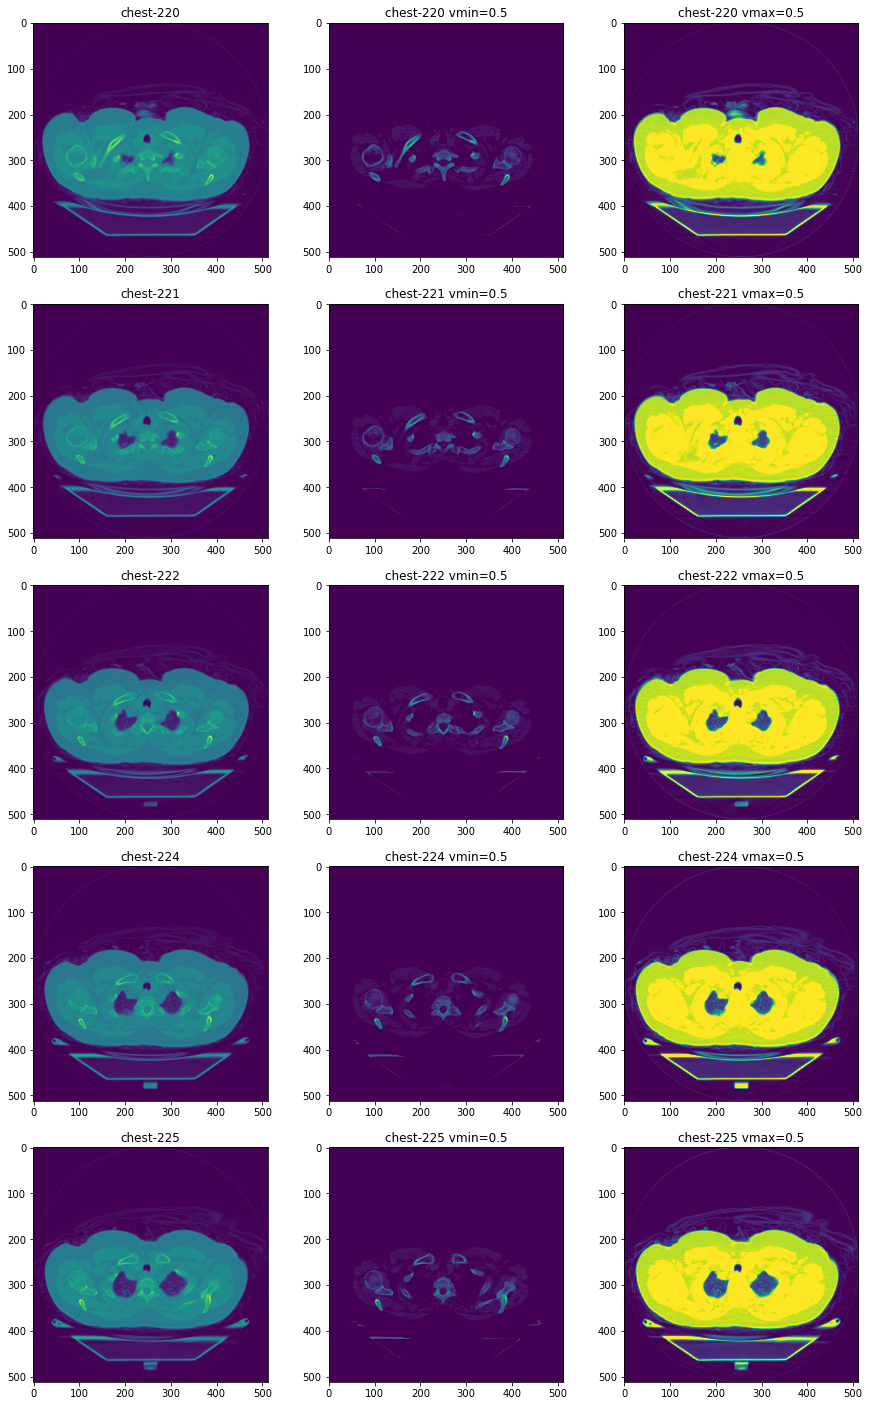

In [60]:
fig = plt.figure(figsize=(15, 25))

rows = 5
columns = 3

fig.add_subplot(rows, columns, 1)
plt.imshow(im_220)
plt.title("chest-220")
fig.add_subplot(rows, columns, 2)
plt.imshow(im_220, vmin=0.5)
plt.title("chest-220 vmin=0.5")
fig.add_subplot(rows, columns, 3)
plt.imshow(im_220, vmax=0.5)
plt.title("chest-220 vmax=0.5")
fig.add_subplot(rows, columns, 4)
plt.imshow(im_221)
plt.title("chest-221")
fig.add_subplot(rows, columns, 5)
plt.imshow(im_221, vmin=0.5)
plt.title("chest-221 vmin=0.5")
fig.add_subplot(rows, columns, 6)
plt.imshow(im_221, vmax=0.5)
plt.title("chest-221 vmax=0.5")
fig.add_subplot(rows, columns, 7)
plt.imshow(im_222)
plt.title("chest-222")
fig.add_subplot(rows, columns, 8)
plt.imshow(im_222, vmin=0.5)
plt.title("chest-222 vmin=0.5")
fig.add_subplot(rows, columns, 9)
plt.imshow(im_222, vmax=0.5)
plt.title("chest-222 vmax=0.5")
fig.add_subplot(rows, columns, 10)
plt.imshow(im_224)
plt.title("chest-224")
fig.add_subplot(rows, columns, 11)
plt.imshow(im_224, vmin=0.5)
plt.title("chest-224 vmin=0.5")
fig.add_subplot(rows, columns, 12)
plt.imshow(im_224, vmax=0.5)
plt.title("chest-224 vmax=0.5")
fig.add_subplot(rows, columns, 13)
plt.imshow(im_225)
plt.title("chest-225")
fig.add_subplot(rows, columns, 14)
plt.imshow(im_225, vmin=0.5)
plt.title("chest-225 vmin=0.5")
fig.add_subplot(rows, columns, 15)
plt.imshow(im_225, vmax=0.5)
plt.title("chest-225 vmax=0.5")

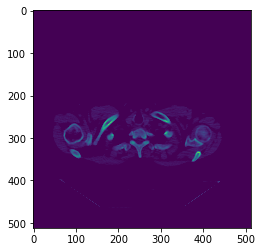

In [55]:
plt.imshow(im_220, vmin=0.5)

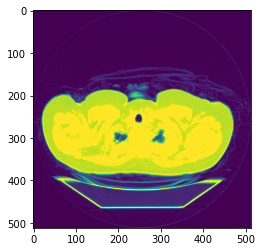

In [57]:
plt.imshow(im_220, vmax=0.5)

Vamos agora partir para o trabalho com imagens em dimensões maiores, isso é, com mais de duas dimensões.

As imagens vêm em todas as formas e tamanhos. Isso os torna versáteis, mas também complexos. Uma imagem padrão em tons de cinza é o tipo mais simples: é uma matriz que pode ser indexada por linhas e colunas.

As imagens 3D cobrem um volume de espaço em vez de apenas um único plano. Esses dados volumétricos são úteis porque podem capturar melhor as complexidades do corpo humano, mas podem ser difíceis de visualizar porque não podem ser resumidos em um único gráfico.

As imagens coloridas também são tridimensionais. As imagens RGB, por exemplo, possuem três canais de cores que, quando renderizadas pelo matplotlib ou outros visualizadores de imagens, expressam uma ampla gama de cores.

Filmes, ou dados de séries temporais, incluem uma dimensão temporal, mostrando como cada elemento muda ao longo do tempo. Como a dimensão planar para volumes 3D, a dimensão temporal é colocada em primeiro lugar por convenção.

Assim como uma imagem 2D é uma pilha de vetores unidimensionais, imagens 3D, 4D e até mesmo de dimensões superiores podem ser pensadas como pilhas de outras mais simples. Vamos ilustrar isso criando um volume 3D a partir de algumas imagens 2D. Primeiro, vamos carregar ImageIO e NumPy. Então, vamos ler em três fatias de uma tomografia computadorizada de tórax. Cada uma dessas fatias é uma matriz com elementos de 512 linhas por elementos de 512 colunas. Agora, podemos alimentar uma lista dessas três imagens na função stack() do NumPy para criar um volume 3D. Se olharmos para o nosso novo array "vol", veremos que ele contém uma terceira dimensão com três elementos ao longo dela, mas as dimensões de linha e coluna são as mesmas de antes.

As "pilhas" de imagens são uma metáfora útil para entender dados multidimensionais. Cada dimensão superior é uma pilha de matrizes dimensionais inferiores.

Neste exercício, usaremos a função stack() do NumPy para combinar vários arrays 2D em um volume 3D. Por convenção, os dados volumétricos devem ser empilhados ao longo da primeira dimensão: `vol[plano, linha, col]`.

Vamos começar lendo as imagens que temos.

In [79]:
im1 = imageio.imread('datasets/tcia-chest-ct-sample/chest-220.dcm')
im2 = imageio.imread('datasets/tcia-chest-ct-sample/chest-221.dcm')
im3 = imageio.imread('datasets/tcia-chest-ct-sample/chest-222.dcm')

O procedimento agora é, literalmente, empilhar as matrizes de cada imagem, formando uma estrutura com três dimensões.

In [80]:
import numpy as np

In [83]:
vol = np.stack([im1, im2, im3], axis=0)
print('Volume dimensions:', vol.shape)

Volume dimensions: (3, 512, 512)


In [84]:
vol = np.stack([im1, im2, im3], axis=1)
print('Volume dimensions:', vol.shape)

Volume dimensions: (512, 3, 512)


In [85]:
vol = np.stack([im1, im2, im3], axis=2)
print('Volume dimensions:', vol.shape)

Volume dimensions: (512, 512, 3)


---

__Tarefa 5:__ Explique, a partir da documentação, como se deu a operação de empilhamento. O que aconteceria se usássemos `axis=1`?

---

In [ ]:
vol = np.stack([im1, im2, im3], axis=1)
print('Volume dimensions:', vol.shape)

---

__Tarefa 6:__ Realizar qualquer operação em um objeto ImageIO Image irá convertê-lo em um numpy.ndarray, removendo seus metadados. Como realizar essa operação e preservar, de forma associada a imagem e aos dados, os metadados de cada paciente?

---

In [ ]:
class Image:
    def __init__(self, img:imageio):
        self.__data = np.array(img)
        self.__meta = img.meta
    
    @property
    def data(self):
        return self.__data
    
    @data.getter
    def data(self):
        return self.__data
    
    @property
    def meta(self):
        return self.__meta
    
    @meta.getter
    def meta(self):
        return self.__meta

In [ ]:
img = Image(im_220)
plt.imshow(img.data, cmap="gray", origin="lower")

---

__Tarefa 7:__ Esse volumes também podem ser carregado diretamente. A função `volread()` do ImageIO é capaz de ler volumes diretamente do disco, independentemente de suas imagens estarem armazenadas em sua própria pasta ou se o conjunto de dados já for multidimensional. Teste o uso dessa função para o volume considerando os dados da pasta inteira. 

---

In [ ]:
vol = imageio.volread("datasets/tcia-chest-ct-sample/")

Ao analisar imagens, lembre-se de que os dados são apenas uma representação do espaço físico real. As informações em suas imagens são limitadas ao número de elementos nelas contidos. Isso é conhecido como forma de matriz no NumPy e está sempre disponível como um atributo. A quantidade de espaço coberto por cada elemento é a taxa de amostragem e pode variar ao longo de cada dimensão. Para imagens DICOM, a taxa de amostragem geralmente é codificada nos metadados. Para outros tipos de formatos de imagem, como JPEG e PNG, pode ser necessário encontrá-lo em outro lugar. O campo de visão é a quantidade total de espaço coberto ao longo de cada eixo. É o produto da forma e da taxa de amostragem. Compreender a diferença entre esses conceitos é importante, e voltaremos a ela ao longo deste projeto.

A quantidade de espaço físico coberto por uma imagem é seu campo de visão, que é calculado a partir de duas propriedades: Forma da matriz, o número de elementos de dados em cada eixo. Pode ser acessado com o atributo shape. Resolução de amostragem, a quantidade de espaço físico coberto por cada pixel. Às vezes disponível em metadados (por exemplo, `meta['sampling']`). Para este exercício, multiplique a forma da matriz e a resolução de amostragem ao longo de cada eixo para calcular o campo de visão de vol. Todos os valores estão em milímetros.

---

__Tarefa 8:__ Calcule o campo de visão do volume calculado na Tarefa 7.

---

In [ ]:
"Campo de visão: {0}".format(np.array(vol.shape) * np.array(vol.meta['sampling']))

A visualização eficiente e abrangente de seus dados é a chave para uma análise de imagem bem-sucedida. 

Vamos comparar nossa imagem a um bolo - é um volume 3D que parece absolutamente delicioso. Mas o que tem dentro do bolo? É banana? Amoras? Nozes? Esta única imagem 2D não pode responder à pergunta. Em vez disso, você teria que cortá-lo e olhar para essas peças individualmente. O conceito para imagens 3D é exatamente o mesmo: para explorar sua matriz multidimensional, você deve visualizar muitas fatias mais simples dela.

É ineficiente traçar cada uma dessas fatias uma a uma. Uma maneira melhor é exibir muitos de uma só vez. Para fazer isso, usaremos a função `subplots()` do PyPlot, que cria uma grade de objetos de eixo com base no número de linhas e colunas que você especificar. Quando você chama `subplots()`, ele retorna um objeto de figura e uma matriz de alças de eixo. Neste caso, a matriz de eixos tem a forma de um por três. Para desenhar imagens em cada subtrama, chamaremos a função imshow() diretamente do objeto axis, em vez de chamá-la por meio do PyPlot. Aqui, estamos plotando a primeira fatia de vol com um mapa de cores cinza. Depois que a primeira fatia for desenhada, repita o processo para as outras fatias. Finalmente, podemos limpar e renderizar a figura. Assim como antes, queremos desativar os ticks e os rótulos chamando o método axis(). No entanto, como faremos a mesma coisa para cada subtrama, um loop for é mais eficiente do que escrever cada comando. Se você tiver muitas imagens para desenhar, também poderá inserir a etapa de desenho em um loop `for`. 

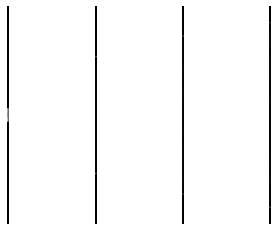

In [90]:
fig, axes = plt.subplots(nrows=1, ncols=4)

for ii in range(4):
    im = vol[ii*40,:,:]
    axes[ii].imshow(im, cmap='gray')
    axes[ii].axis('off')
    
plt.show()

---

__Tarefa 9:__ Conserte o erro do código acima. É possível aumentar o número de fatias do volume?

---

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 8))

for ii in range(4):
    im = vol[ii,:,:]
    axes[ii].imshow(im, cmap='gray')
    axes[ii].axis('off')
    
plt.show()

Na verdade, existem várias maneiras de dividir um volume 3D em imagens 2D. A maneira mais simples é escolher um quadro ao longo da primeira dimensão e plotar a segunda e a terceira uma contra a outra.

Se, em vez disso, você selecionasse uma fatia ao longo da dimensão da linha, obteria uma segunda perspectiva. Nesse caso, estamos traçando da cabeça aos pés versus da esquerda para a direita.

Finalmente, você pode plotar o primeiro e o segundo eixos um contra o outro, produzindo uma terceira visão. Ao observar a anatomia humana, essas diferentes vistas têm nomes especiais: os planos axial, coronal e sagital. Saber em qual plano um conjunto de dados está empilhado pode ajudá-lo a navegar com mais eficiência.

Muitos conjuntos de dados não têm taxas de amostragem iguais em todas as dimensões. Nesses casos, você desejará esticar os pixels ao longo de um lado para levar em conta as diferenças. A quantidade de alongamento necessária é determinada pela proporção. Aqui decidimos plotar uma fatia com dados da primeira e da segunda dimensão. Para determinar a proporção, primeiro obtemos as taxas de amostragem ao longo de cada dimensão do dicionário de metadados. Em seguida, dividimos a taxa de amostragem da primeira dimensão pela taxa de amostragem da segunda. Quando chamamos imshow(), passamos essa proporção para o argumento de aspecto.

Isso resulta em uma imagem com proporções adequadas. Deixar de ajustar o aspecto resultaria em uma imagem distorcida.



---

__Tarefa 10:__ Para este exercício, plote imagens que cortam ao longo da segunda e terceira dimensões do vol. Defina explicitamente a proporção para gerar imagens não distorcidas.

---

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 8))

for ii in range(4):
    im = vol[ii,:,:]
    axes[ii].imshow(im, cmap='gray', aspect='0.5')
    axes[ii].axis('off')
    
plt.show()